In [155]:
import pandas as pd 

df = pd.read_csv("full_dataset_thesis - 1.csv")

In [156]:
df.sample()

,Season,Injury,Days,Games missed,injury_from_parsed,injury_until_parsed,player_name,player_age,player_position,club,league
10588,23/24,Adductor pain,5 days,1,10/28/2023,11/1/2023,Marquinhos,30,Centre-Back,Paris Saint-Germain,Ligue 1


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15603 entries, 0 to 15602
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Season               15603 non-null  object
 1   Injury               15603 non-null  object
 2   Days                 15603 non-null  object
 3   Games missed         15603 non-null  int64 
 4   injury_from_parsed   15603 non-null  object
 5   injury_until_parsed  15603 non-null  object
 6   player_name          15603 non-null  object
 7   player_age           15603 non-null  int64 
 8   player_position      15603 non-null  object
 9   club                 15603 non-null  object
 10  league               15603 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


In [158]:
df["Days"] =df["Days"].str.replace(' days', '', regex=False).astype(int)

df.head()

,Season,Injury,Days,Games missed,injury_from_parsed,injury_until_parsed,player_name,player_age,player_position,club,league
0,20/21,Syndesmosis ligament tear,43,9,1/28/2021,3/11/2021,Alexander Nübel,24,Goalkeeper,Bayern Munich,Bundesliga
1,20/21,Knee injury,37,6,3/7/2021,4/12/2021,Ron-Thorben Hoffmann,22,Goalkeeper,Bayern Munich,Bundesliga
2,20/21,Corona virus,21,4,2/17/2021,3/9/2021,Benjamin Pavard,25,Centre-Back,Bayern Munich,Bundesliga
3,20/21,bruise,8,2,11/6/2020,11/13/2020,Benjamin Pavard,25,Centre-Back,Bayern Munich,Bundesliga
4,20/21,Ligament injury,22,2,7/26/2020,8/16/2020,Benjamin Pavard,25,Centre-Back,Bayern Munich,Bundesliga


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15603 entries, 0 to 15602
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Season               15603 non-null  object
 1   Injury               15603 non-null  object
 2   Days                 15603 non-null  int64 
 3   Games missed         15603 non-null  int64 
 4   injury_from_parsed   15603 non-null  object
 5   injury_until_parsed  15603 non-null  object
 6   player_name          15603 non-null  object
 7   player_age           15603 non-null  int64 
 8   player_position      15603 non-null  object
 9   club                 15603 non-null  object
 10  league               15603 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.3+ MB


In [160]:
df = df.drop(columns=['club','player_name','injury_from_parsed',"injury_until_parsed",'Season'],axis=1)
df.head()


,Injury,Days,Games missed,player_age,player_position,league
0,Syndesmosis ligament tear,43,9,24,Goalkeeper,Bundesliga
1,Knee injury,37,6,22,Goalkeeper,Bundesliga
2,Corona virus,21,4,25,Centre-Back,Bundesliga
3,bruise,8,2,25,Centre-Back,Bundesliga
4,Ligament injury,22,2,25,Centre-Back,Bundesliga


In [161]:
from sklearn.preprocessing import LabelEncoder

le_Injury = LabelEncoder()
le_player_position = LabelEncoder()
le_league  = LabelEncoder()

df["Injury"] = le_Injury.fit_transform(df['Injury'])
df["player_position"] = le_player_position.fit_transform(df['player_position'])
df["league"] = le_league.fit_transform(df['league'])

df


,Injury,Days,Games missed,player_age,player_position,league
0,217,43,9,24,5,0
1,143,37,6,22,5,0
2,71,21,4,25,2,0
3,249,8,2,25,2,0
4,150,22,2,25,2,0
...,...,...,...,...,...,...
15598,54,22,2,27,4,4
15599,9,25,6,27,4,4
15600,9,9,2,27,4,4
15601,12,6,1,28,4,4


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15603 entries, 0 to 15602
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Injury           15603 non-null  int64
 1   Days             15603 non-null  int64
 2   Games missed     15603 non-null  int64
 3   player_age       15603 non-null  int64
 4   player_position  15603 non-null  int64
 5   league           15603 non-null  int64
dtypes: int64(6)
memory usage: 731.5 KB


In [163]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Days','Games missed'],axis=1)
y =df['Days']

X_train ,X_test,y_train,y_test = train_test_split(
    X ,y,test_size=0.2 ,random_state=42
)

In [164]:
from sklearn.preprocessing import StandardScaler

Scaler=StandardScaler()
X_train_Scaled = Scaler.fit_transform(X_train)
X_test_Scaled = Scaler.transform(X_test)


In [165]:
from sklearn.linear_model import LinearRegression
LinearRegression_model = LinearRegression()

LinearRegression_model.fit(X_train_Scaled , y_train)

y_pred = LinearRegression_model.predict(X_test_Scaled)

In [166]:
from sklearn.metrics import mean_absolute_error,r2_score

print("Linear Regression Results")
print ("MAE = ", mean_absolute_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


Linear Regression Results
MAE =  29.934454921519098
R2 Score: 0.005104192071832991


In [167]:
from sklearn.ensemble import RandomForestRegressor

rf_model= RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train_Scaled , y_train)
rf_y_pred = rf_model.predict(X_test_Scaled)

In [168]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score

mae_rf = mean_absolute_error(y_test, rf_y_pred)
r2_rf = r2_score(y_test, rf_y_pred)

print("Random Forest Regression Results")
print(f"MAE: {mae_rf:.2f} days")
print(f"R2 Score: {r2_rf:.3f}")

Random Forest Regression Results
MAE: 23.58 days
R2 Score: 0.257


In [169]:
from xgboost import XGBRegressor

XGBR_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
XGBR_model.fit(X_train_Scaled , y_train)
XGB_y_pred = XGBR_model.predict(X_test_Scaled)

In [170]:
mae_XGB = mean_absolute_error(y_test, XGB_y_pred)
r2_XGB = r2_score(y_test, XGB_y_pred)

print("XGB Regressor Results")
print(f"MAE: {mae_XGB:.2f} days")
print(f"R2 Score: {r2_XGB:.3f}")

XGB Regressor Results
MAE: 23.18 days
R2 Score: 0.306


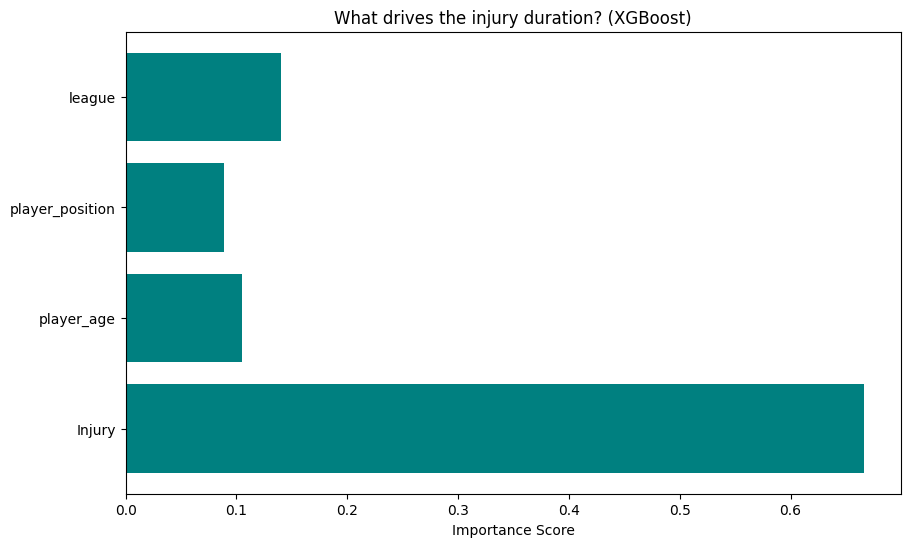

In [171]:
import matplotlib.pyplot as plt

# الحصول على أهمية المزايا
importances = XGBR_model.feature_importances_
feature_names = X.columns

# الرسم البياني
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='teal')
plt.xlabel('Importance Score')
plt.title('What drives the injury duration? (XGBoost)')
plt.show()

In [172]:
import pandas as pd


comparison_df = pd.DataFrame({
    'Actual_Days': y_test.values,
    'Predicted_Days': XGB_y_pred.round(1), 
    'Error (Difference)': (y_test.values - XGB_y_pred).round(1)
})


comparison_df.index = y_test.index
final_check = pd.concat([X_test, comparison_df], axis=1)


final_check.to_csv('Injury_Predictions_Check.csv', index=False)

